In [1]:
import sys
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd gcr-catalogs-master/

/global/cscratch1/sd/zg64/gcr-catalogs-master


In [3]:
import GCRCatalogs

In [4]:
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 1.3.5 | GCR = 0.9.2


In [137]:
gc = GCRCatalogs.load_catalog('dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highdens')
#gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmagic_v0.8.1_highdens')

In [138]:
data = gc.get_quantities([ 'id','ra', 'dec','redshift','zspec',
                         'mag_g_lsst','mag_i_lsst','mag_r_lsst','mag_z_lsst','mag_y_lsst'])

In [130]:
name_array = []
rand_idx = np.random.randint(0,len(data['id']),size = 30)
for idx in rand_idx:
    name_array.append(data['id'][idx])

In [131]:
np.array(name_array)

array([11688689226,  1437743580, 10313132699,  5125764534,  2313038358,
        2126755324,  1751006703, 10625438576,  8688261743, 11563376129,
        5937539934,  2937955908,  6250762091,  8187747632, 10687802491,
       10562504698,  1687797050,  3751370138,  8000650616,  2125141689,
        4125002175, 11313136616,  8687559910,  7938028488,  1625085001,
        3500040160,  4125530380,  7000380189,  5312686130,  2313368417])

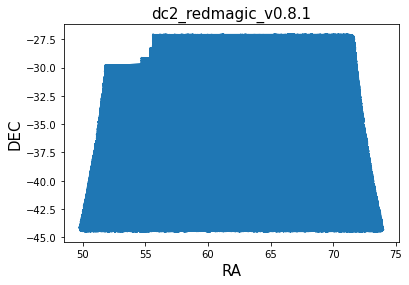

In [6]:
plt.figure(figsize = (6,4))
plt.title('dc2_redmagic_v0.8.1',fontsize = 15)
plt.plot(data['ra'],data['dec'])
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC',fontsize = 15);

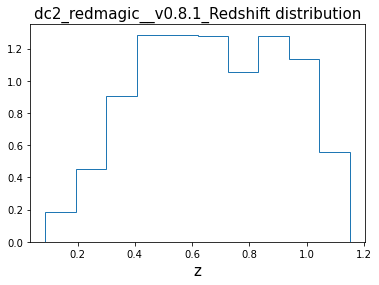

In [14]:

plt.figure(figsize = (6,4))
plt.title('dc2_redmagic__v0.8.1_Redshift distribution',fontsize = 15)
plt.hist(data['redshift'],histtype='step',density=True)
plt.xlabel('z',fontsize= 15);

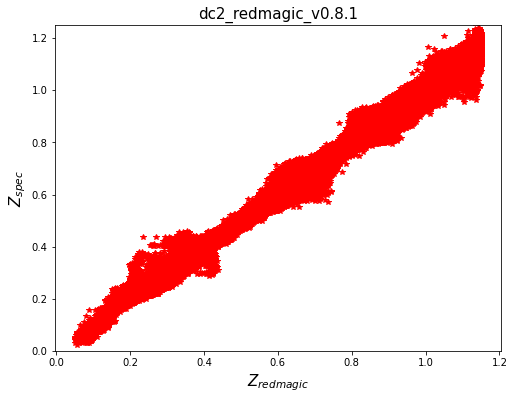

In [13]:
m = data['zspec'] != -1
data['zspec'][m]
plt.figure(figsize = (8,6))
plt.title('dc2_redmagic_v0.8.1',fontsize = 15)
plt.plot(data['redshift'][m],data['zspec'][m],'r*')
plt.ylim(0,1.25)
plt.xlabel(r'$Z_{redmagic}$',fontsize= 15)
plt.ylabel(r'$Z_{spec}$',fontsize= 15);

In [24]:
import os

In [74]:
files.remove('.ipynb_checkpoints')

In [166]:
len(files)

60

In [165]:
data_dir = '../data'
files = os.listdir(data_dir)
if'.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')
for f in files:
    single_gal_color = np.load(os.path.join(data_dir,f))

### Color redshift relation

In [216]:
def plot_c_vs_z (ax,color1,color2):
    #plt.figure(figsize = (8,6))
    gal_clr = data['mag_%s_lsst'%color1]-data['mag_%s_lsst'%color2]
    #plt.plot(data['redshift'], gal_clr,'.k')
    ax.hist2d(data['redshift'], gal_clr, bins=200, cmap='PuBu', norm=clr.LogNorm(),label = 'd')
    #ax.colorbar(label='population density')
    ax.set_ylabel('%s-%s'%(color1,color2),fontsize = 20)
    ax.set_xlabel('z',fontsize = 20)
    ax.legend()
    #plt.title('Galaxy Colors in Clusters',fontsize = 15);


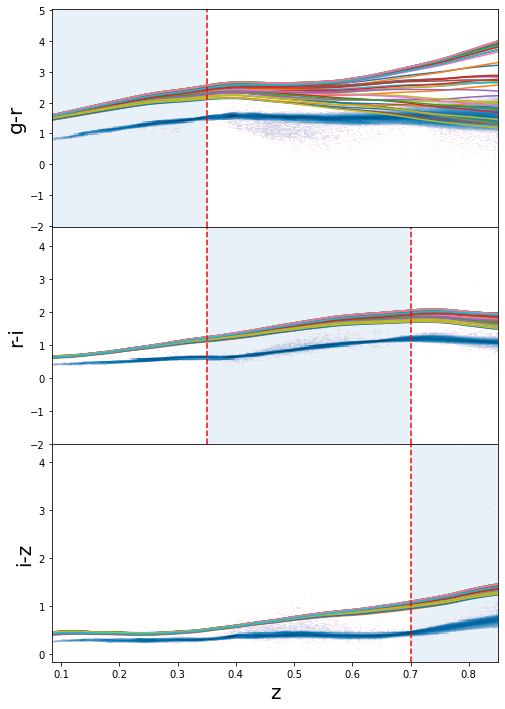

In [217]:
fig,ax = plt.subplots(3,1,figsize = (8,12))
plt.subplots_adjust(hspace=0.0)
color_comb = [['g','r'],['r','i'],['i','z'],['z','y']]
axv_range = [[0,0.35],[0.35,0.7],[0.7,1.2]]
for i,c in enumerate(color_comb[:3]):
    plot_c_vs_z(ax = ax[i], color1 = c[0],color2 = c[1])
    for f in files:
        single_gal_color = np.load(os.path.join(data_dir,f))
        ax[i].plot(redshift,single_gal_color[:,i+1],label = 'id: %s'%f[18:-4])

    ax[i].axvspan(axv_range[i][0],axv_range[i][1],alpha = 0.1)
    ax[i].axvline(axv_range[i][0],color = 'red',ls = '--')
    ax[i].axvline(axv_range[i][1],color = 'red',ls = '--')

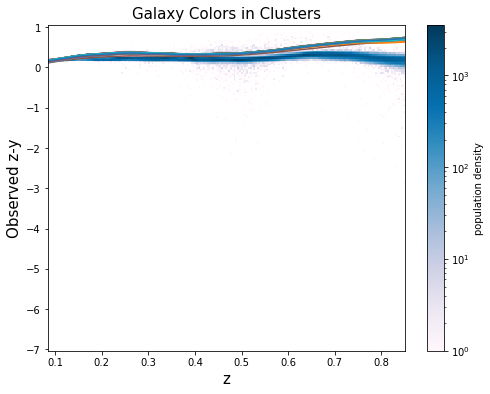

In [142]:
plot_c_vs_z('z','y')
for f in files:
    single_gal_color = np.load(os.path.join(data_dir,f))
    plt.plot(redshift,single_gal_color[:,4],label = 'id: %s'%f[18:-4])
    #plt.legend()